In [2]:
# %load ../standard_import.txt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)
pd.set_option('display.max_seq_items', None)

%matplotlib inline
%config InlineBackend.figure_formats = {'svg',}

import seaborn as sns
sns.set_context('notebook')
#sns.set_style('darkgrid')

In [3]:
import statsmodels.api as sm

In [15]:
mdata = sm.datasets.macrodata.load_pandas().data
dates = mdata[['year', 'quarter']].astype(int).astype(str)
quarterly = dates["year"] + "Q" + dates["quarter"]
from statsmodels.tsa.base.datetools import dates_from_str
quarterly = dates_from_str(quarterly)
mdata = mdata[['realgdp','realcons','realinv']]
mdata.index = pd.DatetimeIndex(quarterly)
data = np.log(mdata).diff().dropna()

In [16]:
mdata.head()

             realgdp  realcons  realinv
1959-03-31  2710.349    1707.4  286.898
1959-06-30  2778.801    1733.7  310.859
1959-09-30  2775.488    1751.8  289.226
1959-12-31  2785.204    1753.7  299.356
1960-03-31  2847.699    1770.5  331.722

In [17]:
data.head()

             realgdp  realcons   realinv
1959-06-30  0.024942  0.015286  0.080213
1959-09-30 -0.001193  0.010386 -0.072131
1959-12-31  0.003495  0.001084  0.034425
1960-03-31  0.022190  0.009534  0.102664
1960-06-30 -0.004685  0.012572 -0.106694

In [21]:
from statsmodels.tsa.arima_process import arma_generate_sample
arparams = np.array([.75, -.25])
maparams = np.array([.65, .35])
arparams = np.r_[1, -arparams]
maparam = np.r_[1, maparams]
nobs = 250
y = arma_generate_sample(arparams, maparams, nobs)
dates = sm.tsa.datetools.dates_from_range('1980m1', length=nobs)
y = pd.TimeSeries(y, index=dates)

In [18]:
#model = sm.tsa.ARMA(data, order=(2,2))
model = sm.tsa.VAR(data)
#results = model.fit(trend='nc', disp=-1)
results = model.fit(2)
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 15, Apr, 2015
Time:                     16:01:46
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                   -27.5830
Nobs:                     200.000    HQIC:                  -27.7892
Log likelihood:           1962.57    FPE:                7.42129e-13
AIC:                     -27.9293    Det(Omega_mle):     6.69358e-13
--------------------------------------------------------------------
Results for equation realgdp
                 coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------
const               0.001527         0.001119            1.365           0.174
L1.realgdp         -0.279435         0.169663           -1.647           0.101
L1.realcons         0.675016         0.131285            5.142    

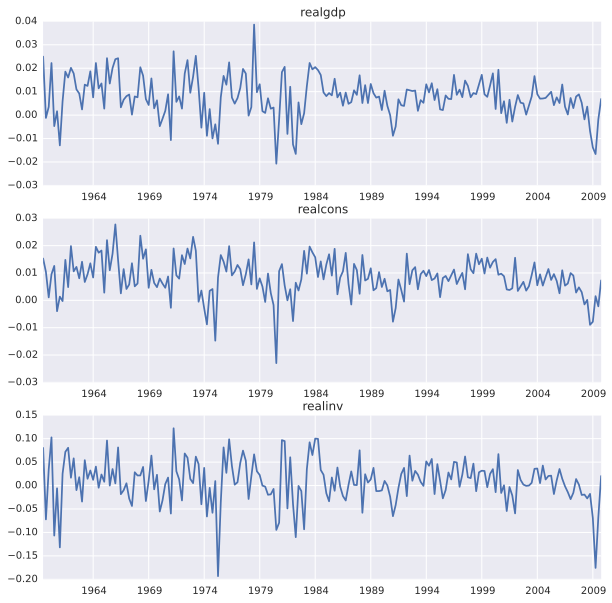

In [20]:
results.plot()